# Семинар 2.2 — Линейная регрессия

## Что такое линейная регрессия «на пальцах»

- Представьте график: по горизонтали — признак (например, доход семьи), по вертикали — то, что хотим предсказать (цена дома).
- Линейная регрессия натягивает через облако точек **прямую линию**, которая проходит «как можно ближе» ко всем точкам.
- Формула предсказания выглядит как `ŷ = a * x + b`. В многомерном случае таких `a` будет больше, но суть та же: складываем вклад каждого признака.

> Пример из жизни: архитектор оценивает стоимость квартиры по площади. Чем больше квадратных метров, тем дороже — прямая возрастает.

## 1. Импортируем нужные библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14

## 2. Загружаем датасет

Будем работать с данными о домах в Калифорнии. Для простоты возьмём **один признак** — медианный доход (`MedInc`)

In [3]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()

print(f"Всего строк: {df.shape[0]}")
df.head()

Всего строк: 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Знакомимся с признаками

- `MedInc` — медианный доход домохозяйств в районе (в десятках тысяч долларов).
- `MedHouseVal` — целевая переменная, медианная стоимость дома (в сотнях тысяч долларов).

## 6. Готовим данные для обучения

- `X` — столбец с доходом (признак).
- `y` — столбец с ценой (цель).
- Делим данные на тренировочную и тестовую части (80% / 20%).

In [ ]:
X = df[["MedInc"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

print(f"Размер train: {X_train.shape[0]} строк")
print(f"Размер test : {X_test.shape[0]} строк")

Размер train: 16512 строк
Размер test : 4128 строк


## 7. Обучаем самую простую модель

Создаём объект `LinearRegression`, учим его на тренировочных данных (`fit`) и получаем коэффициенты.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Коэффициент (наклон): {slope:.2f}")
print(f"Свободный член (сдвиг): {intercept:.2f}")

Коэффициент (наклон): 0.42
Свободный член (сдвиг): 0.44


### Что означают эти числа?

- **Наклон 0.42** (пример): если доход вырастет на 10 000$, цена дома увеличится примерно на 0.42 * 100 000$ = 42 000$.
- **Сдвиг** — базовая цена, когда доход равен нулю (математически нужен для формулы, в реальности мы в нулевой доход не верим).

> Мини-задача: попробуйте в отдельной ячейке подставить свой доход и посчитать цену с помощью формулы `ŷ = slope * доход + intercept`.

## 8. Рисуем найденную прямую

Возьмём точки из теста (их модель не видела) и наложим на них прямую регрессии.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


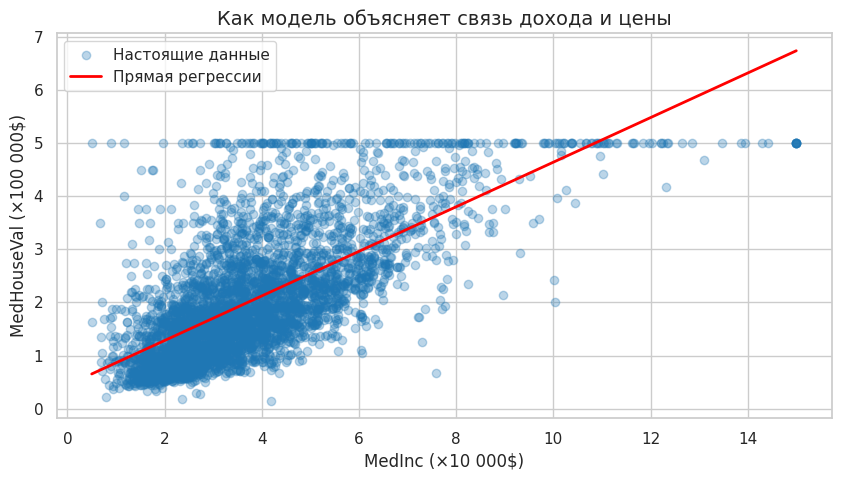

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color="tab:blue", alpha=0.3, label="Настоящие данные")

x_line = np.linspace(X_test.min(), X_test.max(), 100)
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color="red", linewidth=2, label="Прямая регрессии")
plt.title("Как модель объясняет связь дохода и цены")
plt.xlabel("MedInc (×10 000$)")
plt.ylabel("MedHouseVal (×100 000$)")
plt.legend()
plt.show()

## 9. Проверяем точность

### Основные метрики регрессии

---

#### **1. MAE (Mean Absolute Error)**  
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$  
**Что показывает:** среднюю абсолютную ошибку — все промахи считаются «как есть».  
**Жизненный пример:** «Средний чек» ошибки оценщика.  
Если MAE = 0.4 → в среднем промахиваемся на **40 000 $**.

---

#### **2. MSE (Mean Squared Error)**  
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$  
**Что показывает:** квадрат ошибок. Сильно наказывает большие промахи.  
**Жизненный пример:** в банке крупные просчёты критичны,  
поэтому их штрафуют сильнее.

---

#### **3. RMSE (Root Mean Squared Error)**  
$$RMSE = \sqrt{MSE}$$  
**Что показывает:** возвращает ошибку в исходных единицах,  
но продолжает усиливать влияние крупных промахов.  
**Жизненный пример:** «ожидаемая» ошибка в рублях;  
если RMSE = 0.5 → примерно **50 000 $**.

---

#### **4. R² (Coefficient of Determination)**  
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$  
**Что показывает:** долю объяснённой вариации.  
1 — идеал, 0 — модель не лучше среднего.  
**Жизненный пример:** сколько процентов разброса цен объяснили признаками.

---

> 💡 **Почему несколько метрик?**  
> • **MAE** даёт интуитивную среднюю ошибку, «в среднем ошибаемся на X»
> • **MSE/RMSE** чувствительны к выбросам: полезны, когда крупные ошибки недопустимы
> • **R²** показывает, насколько хорошо модель объясняет разброс значений, не говорит о точности в рублях — только о том, насколько модель лучше простого угадывания среднего



In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"MAE : {mae:.3f} (≈ {mae*100_000:.0f} $)")
print(f"RMSE: {rmse:.3f} (≈ {rmse*100_000:.0f} $)")
print(f"R^2 : {r2:.3f}")

MAE : 0.630 (≈ 62991 $)
RMSE: 0.842 (≈ 84209 $)
R^2 : 0.459


### Как читать эти числа?

- `MAE 0.63` → средняя ошибка около 63 000$.
- `RMSE` чуть больше, потому что сильные промахи встречаются.
- `R² ≈ 0.46` → только на доходе объясняем ~47% вариации цен. Остальное — возраст домов, близость к океану и т.д.

> Вывод: одной линией связь уловили, но для лучшего прогноза понадобится больше признаков.

## 10. Небольшой эксперимент: больше признаков

Попробуем добавить ещё два признака (`HouseAge`, `AveRooms`) и сравнить результат. Всё равно оставляем один и тот же класс `LinearRegression`, просто даём ему больше данных.

In [ ]:
X_multi = df[["MedInc", "HouseAge", "AveRooms"]]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi,
    y,
    test_size=0.2,
    random_state=42,
)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_multi = multi_model.predict(X_test_m)

mae_multi = mean_absolute_error(y_test_m, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_multi))
r2_multi = r2_score(y_test_m, y_pred_multi)

print("MAE  (multi):", round(mae_multi, 3))
print("RMSE (multi):", round(rmse_multi, 3))
print("R^2  (multi):", round(r2_multi, 3))

MAE  (multi): 0.603
RMSE (multi): 0.812
R^2  (multi): 0.497


> Видим, что ошибки уменьшились, а `R²` вырос. Значит, модель использует дополнительную информацию и предсказывает лучше. В лабораторной работеожно самостоятельно подобрать интересные признаки и сравнить результаты

## 12. Регуляризация — когда коэффициенты «разбегаются»

Если добавить слишком много признаков, линейная регрессия может переобучиться: коэффициенты становятся нестабильно большими, а модель начинает подстраиваться под шум в данных.\
**Регуляризация** решает эту проблему, добавляя **штраф** за чрезмерно большие веса.

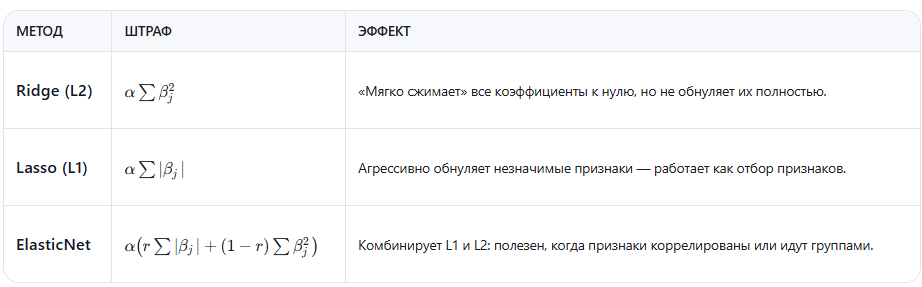|

> **Пример**: прогнозируем стоимость автомобиля по десятку признаков.\
Если среди них есть малоинформативные (например, «код цвета»),

**Lasso** занулит их коэффициенты, упростив модель.\
**Ridge** же не удалит признаки, но «успокоит» коэффициенты, не давая одному из них доминировать.\
**ElasticNet** подойдёт, если, скажем, есть несколько похожих признаков («мощность в л.с.», «объём двигателя») — он может оставить всю группу, но с умеренными весами

### Данные для сравнения

Возьмём три признака: `MedInc`, `HouseAge`, `AveRooms`. Это уже похоже на реальный мини-проект: доход, возраст района и среднее число комнат.

In [ ]:
features = ["MedInc", "HouseAge", "AveRooms"]
X_multi = df[features]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi,
    y,
    test_size=0.2,
    random_state=42,
)

print("Размер train:", X_train_m.shape)
print("Размер test :", X_test_m.shape)

Размер train: (16512, 3)
Размер test : (4128, 3)


### Обучаем три модели и сравниваем

Используем `LinearRegression`, `Ridge`, `Lasso` и `ElasticNet`. Для регуляризаторов покажем коэффициенты — видно, как они «усмиряют» веса.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.05, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.05, l1_ratio=0.5, max_iter=5000),
}

results = []
coef_table = []

for name, model_reg in models.items():
    model_reg.fit(X_train_m, y_train_m)
    y_pred = model_reg.predict(X_test_m)
    mae = mean_absolute_error(y_test_m, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_m, y_pred))
    r2 = r2_score(y_test_m, y_pred)
    results.append({
        "model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
    })
    coef_table.append({
        "model": name,
        **{f: coef for f, coef in zip(features, getattr(model_reg, "coef_", np.zeros(len(features))))}
    })

results_df = pd.DataFrame(results)
coef_df = pd.DataFrame(coef_table)

display(results_df.round(7))
display(coef_df.round(7))

,model,MAE,RMSE,R2
0,LinearRegression,0.603321,0.811733,0.497172
1,Ridge,0.603322,0.811733,0.497172
2,Lasso,0.606099,0.812040,0.496792
3,ElasticNet,0.605089,0.811606,0.497329


,model,MedInc,HouseAge,AveRooms
0,LinearRegression,0.444758,0.016836,-0.028150
1,Ridge,0.444749,0.016836,-0.028147
2,Lasso,0.424918,0.016580,-0.014277
3,ElasticNet,0.431424,0.016672,-0.020240


### Что получилось?

- **LinearRegression** даёт наименьшие ограничения → коэффициенты могут быть крупнее.
- **Ridge** чуть увеличивает штраф за большие веса, метрики становятся стабильнее.
- **Lasso** делает некоторые коэффициенты практически нулевыми, выбрасывая менее важные признаки.
- **ElasticNet** балансирует: часть весов сжимает, часть может занулить, если нужно.

> попробуйте поиграть параметром `alpha`. Чем он больше, тем сильнее штраф. Для Ridge метрики ухудшаются плавно, для Lasso многие коэффициенты могут исчезнуть

## 13. Финальный чек-лист

1. Нарисуйте зависимость «признак → цель», прежде чем обучать модель.
2. Делите данные на train/test, даже если модель простая.
3. Отслеживайте MAE/RMSE/R² и переводите ошибки в реальные единицы (рубли, часы, штуки товара).
4. Если признаков много или они похожи, добавляйте регуляризацию: Ridge для сглаживания, Lasso для отбора, ElasticNet для компромисса.
5. Экспериментируйте: изменение `alpha`, добавление новых признаков, сравнение разных моделей.